<a href="https://colab.research.google.com/github/XieSandi/DicodingMLCourse-Exercise/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Profile

**Hey there Sandi here !**

Contact me on : 

*   yue_xie@outlook.com 
*   hello@xiesandi.cyou

Find me here :

*   [Github](https://github.com/XieSandi)
*   [Dicoding Profile](https://www.dicoding.com/users/xiesandi)



#Load Dataset

Jalankan perintah !wget berikut untuk mendownload dataset ke dalam temporary drive


In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-19 04:57:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  36.8MB/s    in 9.3s    

2021-04-19 04:57:32 (33.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]




#Installing Library / Package


In [2]:
pip install split-folders

#Importing Library

In [3]:
import tensorflow as tf
import splitfolders
import zipfile
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Exctracting dataset

Silahkan sesuaikan dengan folder di drive anda , jika menyimpan file dataset di tempat berbeda (tidak melalui command wget diatas)

In [4]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'scissors', 'rock', 'paper', 'rps-cv-images']

#Spliting

Silahkan sesuaikan dengan link folder tempat anda melakukan perintah extract (jika berbeda)

In [6]:
main_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(main_dir , output="/tmp/rockpaperscissors", seed=1337, ratio=(.6, .4), group_prefix=None)

train_dir = os.path.join('/tmp/rockpaperscissors/', 'train')
validate_dir = os.path.join('/tmp/rockpaperscissors/', 'val')

Copying files: 2188 files [00:00, 3216.20 files/s]


#Trainiing & Validating

In [8]:
# training
train_paper = os.path.join(train_dir, 'paper')
train_rock = os.path.join(train_dir, 'rock')
train_scissor = os.path.join(train_dir, 'scissor')
 
#validating
validation_paper = os.path.join(validate_dir, 'paper')
validation_rock = os.path.join(validate_dir, 'rock')
validation_scissor = os.path.join(validate_dir, 'scissor')

In [19]:
 train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap')

In [26]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validate_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/5
10/10 - 19s - loss: 0.0384 - accuracy: 0.9750 - val_loss: 0.0667 - val_accuracy: 0.9688
Epoch 2/5
10/10 - 19s - loss: 0.0373 - accuracy: 0.9781 - val_loss: 0.0456 - val_accuracy: 0.9812
Epoch 3/5
10/10 - 19s - loss: 0.0397 - accuracy: 0.9781 - val_loss: 0.1100 - val_accuracy: 0.9438
Epoch 4/5
10/10 - 19s - loss: 0.0527 - accuracy: 0.9750 - val_loss: 0.0738 - val_accuracy: 0.9625
Epoch 5/5
10/10 - 19s - loss: 0.0216 - accuracy: 0.9906 - val_loss: 0.0370 - val_accuracy: 0.9750


#Predicting

Saving rock.jpg to rock.jpg
rock.jpg
rock


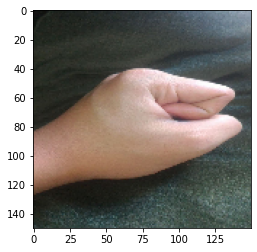

In [40]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = fn
  img_source = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img_source)
  x = image.img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)
  if classes[0, 0] == 1:
    print('rock')
  elif classes[0, 1] == 1:
    print('paper')
  elif classes[0, 2] == 1:
    print('scissors')